In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_monthly_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [6]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('mnth','casual','registered','cnt')
group_df = group_df.groupBy('mnth').mean()
group_df = group_df.select('mnth',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('mnth').alias('Month'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('avg(cnt)')
count_df = group_df.withColumn('Month', when(group_df.Month == 1, 'Jan')
                               .otherwise(when(group_df.Month == 2, 'Feb')
                               .otherwise(when(group_df.Month == 3, 'Mar')
                               .otherwise(when(group_df.Month == 4, 'Apr')
                               .otherwise(when(group_df.Month == 5, 'May')
                               .otherwise(when(group_df.Month == 6, 'Jun')
                               .otherwise(when(group_df.Month == 7, 'Jul')
                               .otherwise(when(group_df.Month == 8, 'Aug')
                               .otherwise(when(group_df.Month == 9, 'Sep')
                               .otherwise(when(group_df.Month == 10, 'Oct')
                               .otherwise(when(group_df.Month == 11, 'Nov')
                               .otherwise(when(group_df.Month == 12, 'Dec').otherwise('Unknown')))))))))))))
pd.DataFrame(count_df.take(count_df.count()), columns=count_df.columns)

,Month,Average Casual,Average Registered,Average CNT
0,Jan,9.48,88.65,98.14
1,Feb,11.63,102.72,114.35
2,Dec,14.70,127.76,142.46
3,Mar,30.22,125.52,155.74
4,Nov,25.49,151.87,177.36
5,Apr,42.30,144.97,187.26
6,Oct,41.03,180.28,221.31
7,May,50.59,172.31,222.91
8,Jul,52.52,179.30,231.82
9,Aug,48.72,188.94,237.66


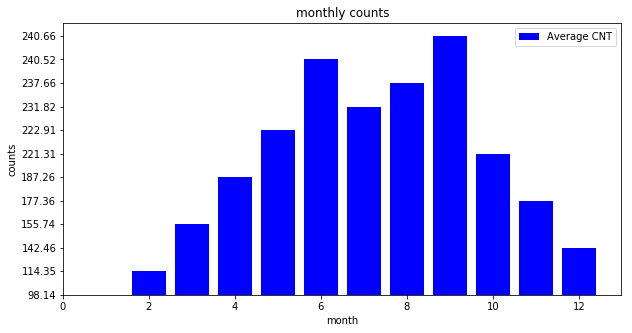

In [7]:
import matplotlib.pyplot as plt

group_df = group_df.toPandas()
plt.bar(group_df['Month'], group_df['Average CNT'], color = 'b')
plt.legend(['Average CNT'])
plt.xlabel('month')
plt.ylabel('counts')
plt.title('monthly counts')
plt.show()

In [5]:
plt.rcParams['figure.figsize'] = (10,5)